<a href="https://colab.research.google.com/github/AnshSharma16/Machine-learning-regression-with-Python/blob/main/HousePricePrediction-MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("housing_price_dataset.csv")
print(df)

Saving housing_price_dataset.csv to housing_price_dataset (1).csv
       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.58321

In [9]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Neighborhood'] = le.fit_transform(df['Neighborhood'])
print(df)

       SquareFeet  Bedrooms  Bathrooms  Neighborhood  YearBuilt          Price
0            2126         4          1             0       1969  215355.283618
1            2459         3          2             0       1980  195014.221626
2            1860         2          1             1       1970  306891.012076
3            2294         2          1             2       1996  206786.787153
4            2130         5          2             1       2001  272436.239065
...           ...       ...        ...           ...        ...            ...
49995        1282         5          3             0       1975  100080.865895
49996        2854         2          2             1       1988  374507.656727
49997        2979         5          3             1       1962  384110.555590
49998        2596         5          2             0       1984  380512.685957
49999        1572         5          3             0       2011  221618.583218

[50000 rows x 6 columns]


In [12]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate years old
df['yearsold'] = current_year - df['YearBuilt']
df = df.drop(['YearBuilt'], axis=1)

print(df)

       SquareFeet  Bedrooms  Bathrooms  Neighborhood          Price  yearsold
0            2126         4          1             0  215355.283618        55
1            2459         3          2             0  195014.221626        44
2            1860         2          1             1  306891.012076        54
3            2294         2          1             2  206786.787153        28
4            2130         5          2             1  272436.239065        23
...           ...       ...        ...           ...            ...       ...
49995        1282         5          3             0  100080.865895        49
49996        2854         2          2             1  374507.656727        36
49997        2979         5          3             1  384110.555590        62
49998        2596         5          2             0  380512.685957        40
49999        1572         5          3             0  221618.583218        13

[50000 rows x 6 columns]


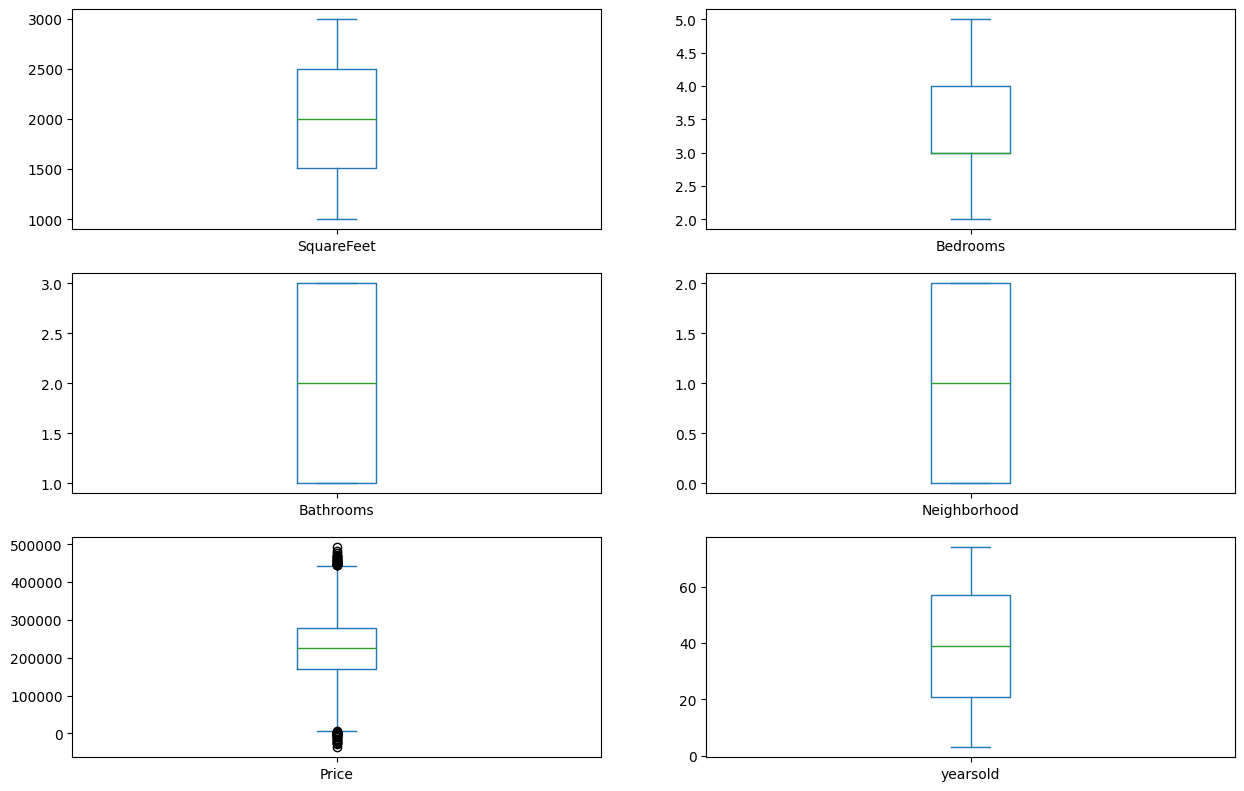

In [13]:
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20))
plt.show()

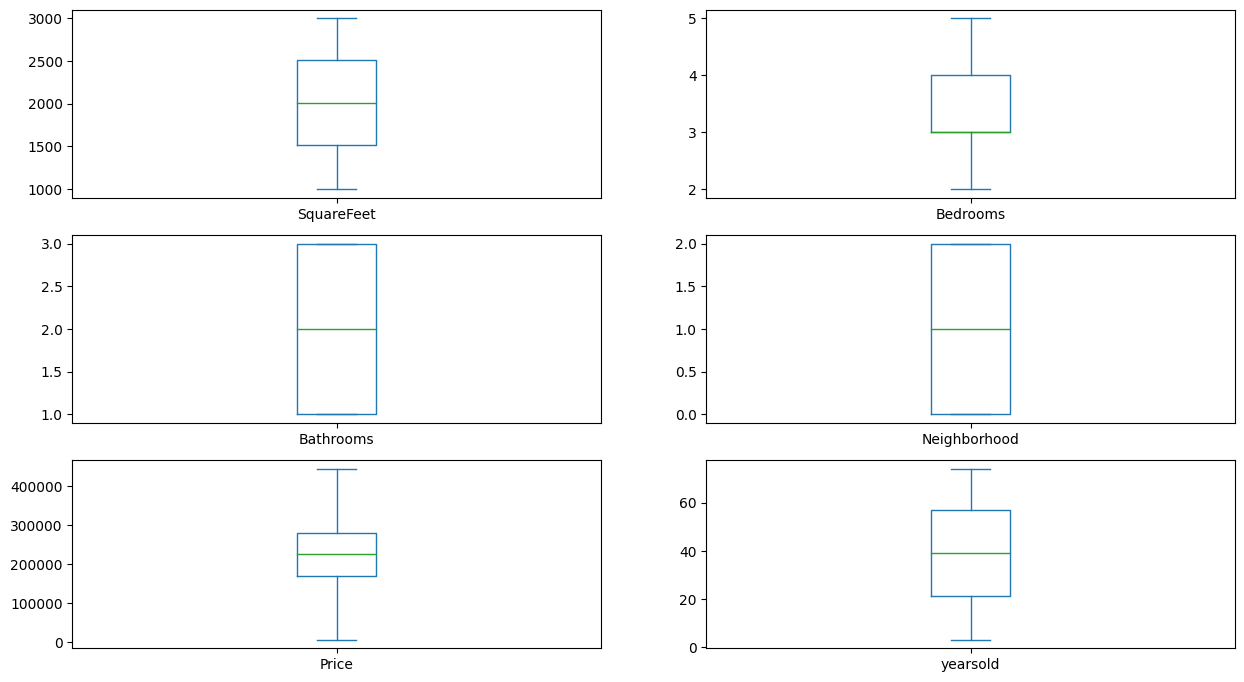

In [15]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1
df = treat_outliers_all(df , df.iloc[:,0::])

df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
x = df[['SquareFeet',  'Bedrooms', 'Bathrooms', 'Neighborhood','yearsold']]
y = df['Price']

print("x:\n",x)
print("y:\n",y)


x:
        SquareFeet  Bedrooms  Bathrooms  Neighborhood  yearsold
0            2126         4          1             0        55
1            2459         3          2             0        44
2            1860         2          1             1        54
3            2294         2          1             2        28
4            2130         5          2             1        23
...           ...       ...        ...           ...       ...
49995        1282         5          3             0        49
49996        2854         2          2             1        36
49997        2979         5          3             1        62
49998        2596         5          2             0        40
49999        1572         5          3             0        13

[50000 rows x 5 columns]
y:
 0        215355.283618
1        195014.221626
2        306891.012076
3        206786.787153
4        272436.239065
             ...      
49995    100080.865895
49996    374507.656727
49997    384110.555590
499

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

r2_score(y_test, y_pred)
mean_absolute_error(y_test, y_pred)
mean_squared_error(y_test, y_pred)
print("r2 score: ", r2_score(y_test, y_pred))
print("mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("mean squared error: ", mean_squared_error(y_test, y_pred))
print("root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))




r2 score:  0.5705821494141224
mean absolute error:  40263.925528057516
mean squared error:  2513517960.4861164
root mean squared error:  50134.99736198374


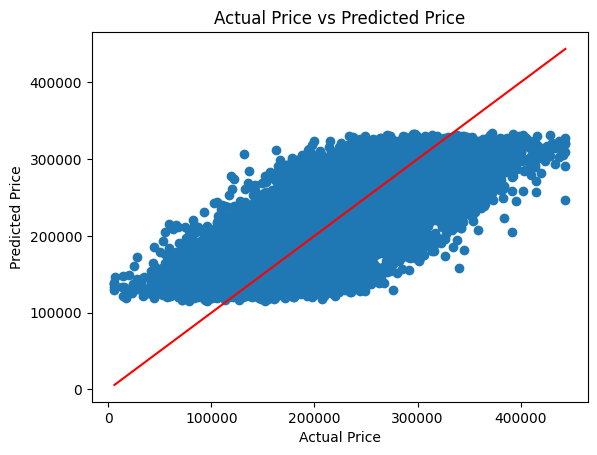

In [38]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual Price vs Predicted Price')
plt.show()

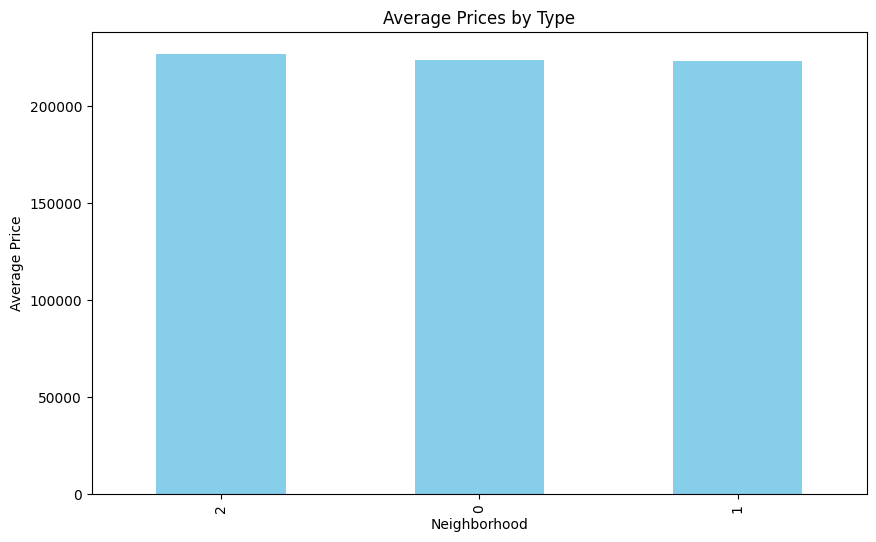

In [44]:
average_prices = df.groupby('Neighborhood')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Prices by Type')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.show()